In [2]:
import keras.layers as layers
import keras.models as models
import keras.optimizers as optimizers
import keras.losses as losses
import keras.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
# import all the xlsx files from database directory

def get_data():
    # get all the excel files in the database directory
    excel_files = glob.glob('../database/*.xlsx')
    # create a list to store all the dataframes
    dataframes = []
    print(excel_files)
    # loop through the excel files and append the dataframes to the list
    for file in excel_files:
        print("file", file)
        dataframes.append(pd.read_excel(file))
    # concatenate all the dataframes into one dataframe
    if (len(dataframes) > 0):
        df = pd.concat(dataframes)
    else:
        df = pd.DataFrame()
    # return the dataframe
    return df

data = get_data()

['../database\\result4757180.xlsx']
file ../database\result4757180.xlsx


In [4]:
data.head()

,Filename,Choice
0,./images/montreal\autumn-colors-in-montreal-ci...,1
1,./images/montreal\autumn-in-montreal-picture-i...,1
2,./images/montreal\bike-ride-in-montreal-pictur...,1
3,./images/montreal\downtown-montreal-skyline-at...,1
4,./images/montreal\golden-hour-view-of-the-city...,0


In [5]:
images = []
labels = []

for index, row in data.iterrows():
    image_path = '../images/montreal/resized/'+row['Filename'].split('\\')[-1]    


    # image_path = row['Filename']
    # image_path = image_path.split('\\')
    # print(image_path)

    if os.path.exists(image_path):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = np.array(image)
        images.append(image)
        labels.append(row['Choice'])
images = np.array(images)
labels = np.array(labels)

In [6]:
# preprocess the images
images = images / 255.0


In [7]:
print(images.shape)

(38, 224, 224, 3)


In [16]:
labels

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Building the CNN model:

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])


In [17]:
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.1, random_state=42)
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
2/2 [==============================] - 1s 334ms/step - loss: 0.1582 - accuracy: 0.9412 - val_loss: 1.1963 - val_accuracy: 0.7500
Epoch 2/10
2/2 [==============================] - 1s 209ms/step - loss: 0.2058 - accuracy: 0.9412 - val_loss: 0.5903 - val_accuracy: 0.7500
Epoch 3/10
2/2 [==============================] - 1s 203ms/step - loss: 0.1084 - accuracy: 0.9412 - val_loss: 0.5226 - val_accuracy: 0.7500
Epoch 4/10
2/2 [==============================] - 1s 209ms/step - loss: 0.2611 - accuracy: 0.9412 - val_loss: 0.5615 - val_accuracy: 0.7500
Epoch 5/10
2/2 [==============================] - 1s 215ms/step - loss: 0.1026 - accuracy: 0.9412 - val_loss: 2.5887 - val_accuracy: 0.7500
Epoch 6/10
2/2 [==============================] - 1s 229ms/step - loss: 0.4910 - accuracy: 0.9412 - val_loss: 2.0571 - val_accuracy: 0.7500
Epoch 7/10
2/2 [==============================] - 1s 217ms/step - loss: 0.3409 - accuracy: 0.9412 - val_loss: 1.0174 - val_accuracy: 0.7500
Epoch 8/10
2/2 [====

In [10]:
len(x_val)

8

In [11]:
predictions = model.predict(x_train)


1/1 [==============================] - 0s 265ms/step


In [18]:
predictions_classes = np.argmax(predictions, axis=1)

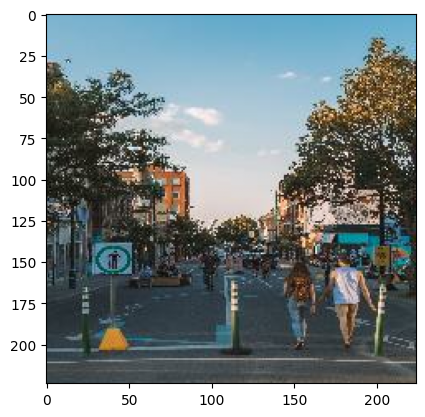

Prediction:  0
Actual:  1


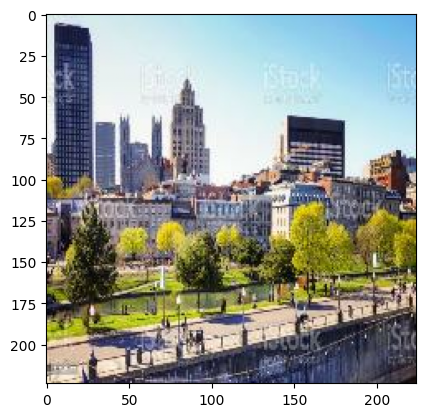

Prediction:  0
Actual:  1


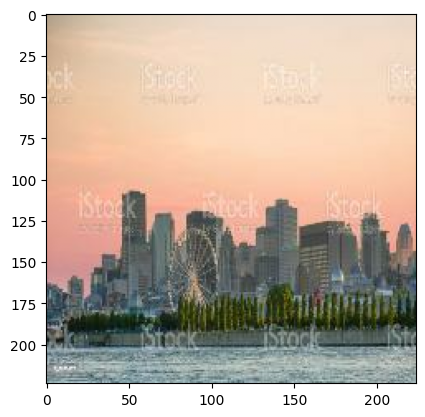

Prediction:  0
Actual:  0


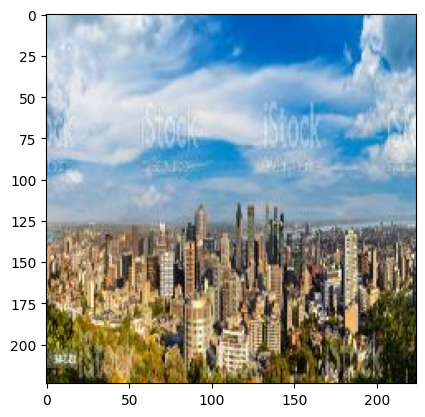

Prediction:  0
Actual:  1


In [19]:
#show the images of the x_val set
for i in range(0, len(x_val)):
    plt.imshow(x_val[i])
    plt.show()
    print("Prediction: ", predictions_classes[i])
    print("Actual: ", y_val[i])

In [20]:
for i, prediction in enumerate(predictions_classes):
    print("Image", i, ": Prediction = ", prediction)

Image 0 : Prediction =  0
Image 1 : Prediction =  0
Image 2 : Prediction =  0
Image 3 : Prediction =  0
Image 4 : Prediction =  0
Image 5 : Prediction =  0
Image 6 : Prediction =  0
Image 7 : Prediction =  0
Image 8 : Prediction =  0
Image 9 : Prediction =  0
Image 10 : Prediction =  0
Image 11 : Prediction =  0
Image 12 : Prediction =  0
Image 13 : Prediction =  0
Image 14 : Prediction =  0
Image 15 : Prediction =  0
Image 16 : Prediction =  0
Image 17 : Prediction =  0
Image 18 : Prediction =  0
Image 19 : Prediction =  0
Image 20 : Prediction =  0
Image 21 : Prediction =  0
Image 22 : Prediction =  0
Image 23 : Prediction =  0
Image 24 : Prediction =  0
Image 25 : Prediction =  0
Image 26 : Prediction =  0
Image 27 : Prediction =  0
Image 28 : Prediction =  0
Image 29 : Prediction =  0


In [15]:
# save the model to disk
model.save('model.h5')
